In [59]:
# seaborn
# kaggle eda
# kaggle seaborn
# pair coding
# oop & fp
# 프로퍼티 멤버변수 attribute
# https://www.daleseo.com/python-property/
# df.shape와 df.head() 차이점
# https://pyvisuall.tistory.com/31?category=927879-matplotlib 그래프 처음부터 그리기
# http://bigdata.dongguk.ac.kr/lectures/Python/_book/plot-using-matplotlib-pandas-seaborn.html#%ED%99%98%EA%B2%BD%EC%84%A4%EC%A0%95
# https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python/notebook
# https://zephyrus1111.tistory.com/86
# https://wikidocs.net/31698 ;tf-idf
# https://wikidocs.net/32105 ;keras
# https://seaborn.pydata.org/api.html
# https://velog.io/@yst3147/series/%EB%B6%80%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%94%84-ai-tech-Data-Viz
# https://velog.io/@yst3147/Seaborn-%EA%B8%B0%EC%B4%88
# https://www.kaggle.com/code/subinium/seaborn-categorical-api-explanation/notebook
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.api.types.CategoricalDtype.html
# https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html
# https://wikidocs.net/24557
# https://wikidocs.net/4308

### 자연어 처리

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline
# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

In [2]:
# sms = pd.read_csv("spam.csv", encoding='latin-1')

# Spam Message Classifier

- importing Libraries
- Data Visualization
- Data Preprocessing
- Model Training
- Conclusion

In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
print("Null Values entry in Unnamed:2 column={}\n\
Null Values entry in Unnamed:3 column={}\n\
Null Values entry in Unnamed:4 column={}".\
      format(df['Unnamed: 2'].isnull().sum(),df['Unnamed: 3'].isnull().sum(),df['Unnamed: 2'].isnull().sum()))

Null Values entry in Unnamed:2 column=5522
Null Values entry in Unnamed:3 column=5560
Null Values entry in Unnamed:4 column=5522


In [10]:
df.shape

(5572, 5)

In [11]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

In [14]:
df.rename(columns={'v1':'Label','v2':'text'}, inplace=True)

total no. of ham msgs: 4825
 no. of spam msgs : 747


<AxesSubplot:>

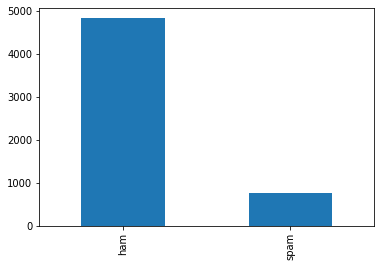

In [15]:
print("total no. of ham msgs: {}\n no. of spam msgs : {}".format(df['Label'].value_counts()[0],df['Label'].value_counts()[1]))
df['Label'].value_counts().plot.bar()

In [16]:
print(df['Label'].value_counts()[0])
print(df['Label'].value_counts()[1])

4825
747


In [17]:
df

,Label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
df.describe()

,Label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
df['len']=df['text'].apply(len)
df.head()

,Label,text,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df.sort_values(['len'], ascending=False)

,Label,text,len
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
...,...,...,...
5268,ham,\ER,3
4496,ham,Ok,2
5357,ham,Ok,2
1924,ham,Ok,2


In [21]:
print("Message={}\n\nLabel={}".format(df['text'][df['len'].idxmax()],df['Label'][df['len'].idxmax()]))
# idmax: 최대값을 갖는 인덱스 레이블을 출력한다.
# df.sort_values(['len'], ascending=False).iloc[0]
# df['text'][df['len'].idmax()],df['Label'][df['len'].idmax()]
# df['text'][df['len'].idxmax()]

Message=For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..

Label=ham


In [22]:
# type(df['text'][df['len'].idmax()])

In [23]:
# type(df['text'][df['len']])

In [171]:
# df['text'][df['len']].idmax()
# pandas get idmax 검색

In [24]:
# Show the shortest msg and its label
print("Message={}\n\nLabel={}".format(df['text']\
                                      [df['len'].idxmin()],df['Label'][df['len'].idxmin()]))
print("Message={}\n\nLabel={}".format(df['text']\
                                      [df['len'].idxmin()],df['Label'][df['len'].idxmin()]))

Message=Ok

Label=ham
Message=Ok

Label=ham


Text(0.5, 1.0, 'Length Histogram')

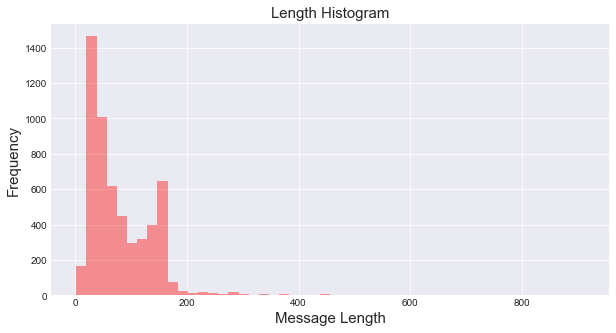

In [25]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 5))
sns.distplot(df['len'], kde=False, color='red', hist=True)
plt.xlabel("Message Length", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Length Histogram", size=15)

Text(0.5, 0, 'Message Length')

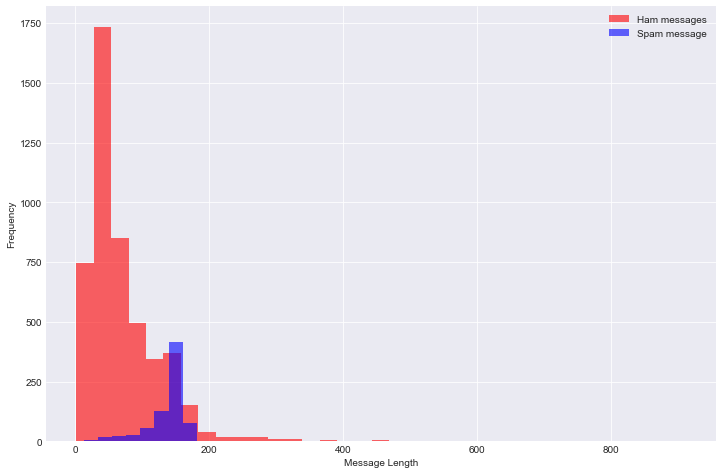

In [26]:
plt.figure(figsize=(12, 8))

df[df['Label']=='ham'].len.plot(bins=35, kind='hist', color='red',
                               label='Ham messages', alpha=0.6)
df[df['Label']=='spam'].len.plot(kind='hist', color = 'blue',
                                label='Spam message', alpha=0.6)
plt.legend()

plt.xlabel("Message Length")

# Data Preprocessing

In [27]:
!pip install nltk
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
ps = PorterStemmer()  # using porterstemmer for text processing
message = []
for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]',' ',df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    message.append(review)
message[1000]

'heard abt tat'

In [83]:
# 파이썬 정규 표현식을 이용한 문자열 치화 방법 및 예제
# 정규 표현식을 이용하여 문자열을 치환

# re.sub(정규 표현식(검색 패턴을 지정), 대상 문자열(검색 대상이 되는 문자열), 치환 문자(변경하고 싶은 문자))

import re
text = "I like apble And abple"
text_mod = re.sub('apble|abple',"apple", text)
print(text_mod)

I like apple And apple


In [88]:
# https://wikidocs.net/1642
# 정규 표현식 수동으로 표현하기
# 주민등록번호를 포함하고 있는 텍스트가 있다. 이 텍스트에 포함된 모든 주민등록번호의 뒷자리를 * 문자로 변경해 보자

# python join 함수(문자열 합치기): 매개변수로 들어온 리스트를 합쳐서 하나의 문쟈열로 바꾸어 반환함
# https://blockdmask.tistory.com/468

data = """
park 800905-1049118
kim 700905-1059119
"""

result = []
for line in data.split("\n"):
    word_result = []
    for word in line.split(" "):
        if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
            word = word[:6] + "-" + "******"
        word_result.append(word)
    result.append(" ".join(word_result))
print("\n".join(result))


park 800905-******
kim 700905-******



In [91]:
## 정규식 이용
import re

data = """
park 800905-1049118
kim 700905-1059119
"""

pat = re.compile("(\d{6})[-]\d{7}")
print(pat.sub("\g<1>-******", data))


park 800905-******
kim 700905-******



In [58]:
df['temp'] = message
df['temp_len'] = df['temp'].apply(lambda x: len(x))
df.describe()

# df['clean_msg']=np.empty((len(message),1))
# for i in range(len(message)):
#     df['clean_msg'][i]=message[i]
# df['clean_msg_len']=df['clean_msg'].apply(len)
# df.head()

,len,clean_msg_len,label,temp_len
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,80.118808,45.864142,0.865937,45.864142
std,59.690841,35.405845,0.340751,35.405845
min,2.000000,0.000000,0.000000,0.000000
25%,36.000000,20.000000,1.000000,20.000000
50%,61.000000,35.000000,1.000000,35.000000
75%,121.000000,68.000000,1.000000,68.000000
max,910.000000,412.000000,1.000000,412.000000


In [30]:
df['text'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: text, dtype: object

In [31]:
df

,Label,text,len,clean_msg,clean_msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,99
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,nd time tri contact u u pound prize claim easi...,78
5568,ham,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home,21
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest,17
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...,65


In [32]:
df['clean_msg'].describe()

count                 5572
unique                5056
top       sorri call later
freq                    30
Name: clean_msg, dtype: object

In [33]:
#df=pd.concat([df, pd.get_dummies(df['Label'])], axis=1)

df=pd.concat([df, pd.get_dummies(df['Label'])], axis=1)
df.drop(['Label'],axis=1,inplace=True)
df.drop(['spam'],axis=1,inplace=True)
df.rename(columns={'ham':'label'},inplace=True)
df.head()
# 1-Ham 0-Spam

,text,len,clean_msg,clean_msg_len,label
0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76,1
1,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,99,0
3,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35,1
4,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36,1


# Vectorization

In [34]:
X=df['clean_msg']
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_msg, Length: 5572, dtype: object

In [39]:
Y=df['label'] # usin Countervectorizer for vectorization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(message).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
# print(X)
Y=np.array(Y)
type(Y)
#t(Y)

numpy.ndarray

# Model Training

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=1)
print("X_train shape: {}\nX_test shape: {}\n\
y_train shape: {}\ny_test shape: {}".\
      format(X_train.shape, X_test.shape, y_train, y_test.shape))

X_train shape: (3900, 2500)
X_test shape: (1672, 2500)
y_train shape: [1 1 0 ... 1 1 1]
y_test shape: (1672,)


In [51]:
# list for storing accuracy score of different algorithms
acc=[]

In [ ]:
## 나이브 베이즈 분류